In [727]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
import os

In [728]:
#Lets load the data series
import pandas as pd

file_path = "/kaggle/input/indian-traffic-violation/Indian_Traffic_Violations.csv"  # Ensure the file exists

raw_data=pd.read_csv(file_path)
raw_data.head()

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,Driver_Age,Driver_Gender,License_Type,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Number_of_Passengers,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,25,Male,Commercial,5,Cloudy,Slippery,OFF9971,Local Police,Valid,4,NaN,Yes,Green,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,32,Female,Commercial,4,Rainy,Dry,OFF6000,Highway Patrol,Valid,4,NaN,No,Green,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,67,Female,Two-Wheeler,8,Clear,Potholes,OFF5706,Local Police,Valid,5,Yes,Yes,Yellow,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,46,Male,Learner,3,Rainy,Wet,OFF5575,Highway Patrol,Valid,2,No,No,Green,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,63,Female,Four-Wheeler,4,Foggy,Potholes,OFF7147,Traffic Police,Valid,4,NaN,No,Red,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN


In [729]:
raw_data.shape
raw_data.columns

Index(['Violation_ID', 'Violation_Type', 'Fine_Amount', 'Location', 'Date',
       'Time', 'Vehicle_Type', 'Vehicle_Color', 'Vehicle_Model_Year',
       'Registration_State', 'Driver_Age', 'Driver_Gender', 'License_Type',
       'Penalty_Points', 'Weather_Condition', 'Road_Condition', 'Officer_ID',
       'Issuing_Agency', 'License_Validity', 'Number_of_Passengers',
       'Helmet_Worn', 'Seatbelt_Worn', 'Traffic_Light_Status', 'Speed_Limit',
       'Recorded_Speed', 'Alcohol_Level', 'Breathalyzer_Result', 'Towed',
       'Fine_Paid', 'Payment_Method', 'Court_Appearance_Required',
       'Previous_Violations', 'Comments'],
      dtype='object')

In [730]:
cleaned_data_frame=raw_data[['Violation_Type', 'Fine_Amount', 'Location', 'Date', 'Vehicle_Type',
       'Registration_State', 'Driver_Age', 'Driver_Gender', 'License_Type','Weather_Condition', 'Road_Condition', 'Officer_ID',
       'Issuing_Agency', 'License_Validity', 
       'Helmet_Worn', 'Seatbelt_Worn', 'Traffic_Light_Status', 'Speed_Limit',
       'Recorded_Speed', 'Alcohol_Level', 'Court_Appearance_Required',
       'Previous_Violations', 'Comments']]

cleaned_data_frame.head()

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender
2,Using Mobile Phone,4785,Maharashtra,2023-01-03,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,NaN
3,No Seatbelt,1138,Uttar Pradesh,2023-01-04,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,Repeat Offender
4,Over-speeding,1610,Karnataka,2023-01-05,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,NaN


In [731]:
cleaned_data_frame.shape

(4000, 23)

In [732]:
cleaned_data_frame.dtypes

Violation_Type                object
Fine_Amount                    int64
Location                      object
Date                          object
Vehicle_Type                  object
Registration_State            object
Driver_Age                     int64
Driver_Gender                 object
License_Type                  object
Weather_Condition             object
Road_Condition                object
Officer_ID                    object
Issuing_Agency                object
License_Validity              object
Helmet_Worn                   object
Seatbelt_Worn                 object
Traffic_Light_Status          object
Speed_Limit                    int64
Recorded_Speed                 int64
Alcohol_Level                float64
Court_Appearance_Required     object
Previous_Violations            int64
Comments                      object
dtype: object

In [733]:
cleaned_data_frame["Year"]=cleaned_data_frame["Date"].str.split("-").str[0].copy()
cleaned_data_frame.head()
cleaned_data_frame.drop(columns="Date").copy()
cleaned_data_frame.head()


<ipython-input-733-dbe8b0f8b2fb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023
2,Using Mobile Phone,4785,Maharashtra,2023-01-03,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,NaN,2023
3,No Seatbelt,1138,Uttar Pradesh,2023-01-04,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,Repeat Offender,2023
4,Over-speeding,1610,Karnataka,2023-01-05,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,NaN,2023


Text(0.5, 1.0, 'Number of Vehicles')

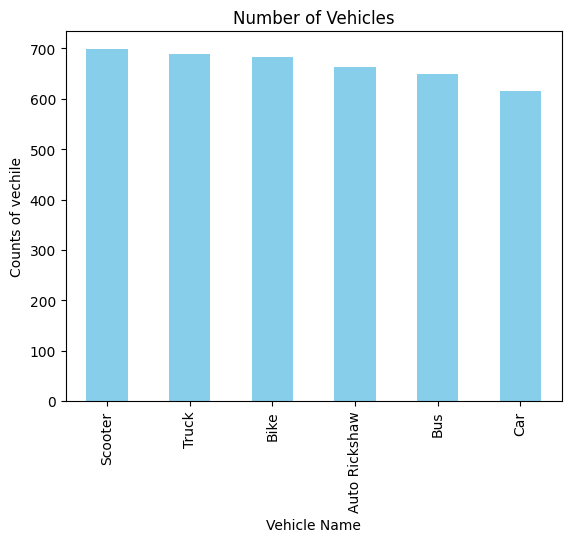

In [734]:
cleaned_data_frame.drop(["Officer_ID","Comments","Helmet_Worn","Seatbelt_Worn","Date"],axis=1)
ax1=cleaned_data_frame["Vehicle_Type"].value_counts().plot(kind="bar",color="skyblue")
ax1.set_ylabel("Counts of vechile")
ax1.set_xlabel("Vehicle Name")
ax1.set_title("Number of Vehicles")


In [735]:
cleaned_data_frame["Violation_Type"].astype("category").cat.codes
cleaned_data_frame.head(5)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023
2,Using Mobile Phone,4785,Maharashtra,2023-01-03,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,NaN,2023
3,No Seatbelt,1138,Uttar Pradesh,2023-01-04,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,Repeat Offender,2023
4,Over-speeding,1610,Karnataka,2023-01-05,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,NaN,2023


Text(0.5, 0, 'Location[Staewise]')

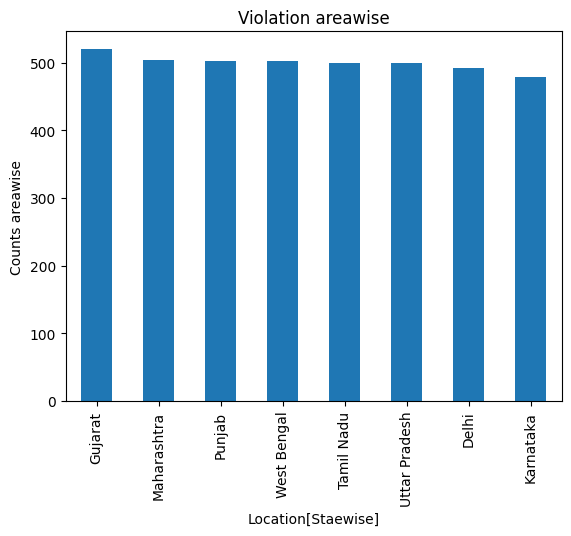

In [736]:

ax1=cleaned_data_frame["Location"].value_counts().plot(kind="bar",title="Violation areawise")
ax1.set_ylabel("Counts areawise")
ax1.set_facecolor("white")
ax1.set_xlabel("Location[Staewise]")

In [737]:
cleaned_data_frame.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


In [738]:
cleaned_data_frame.Driver_Age.corr(cleaned_data_frame.Fine_Amount)



0.006102380428190278

<Axes: >

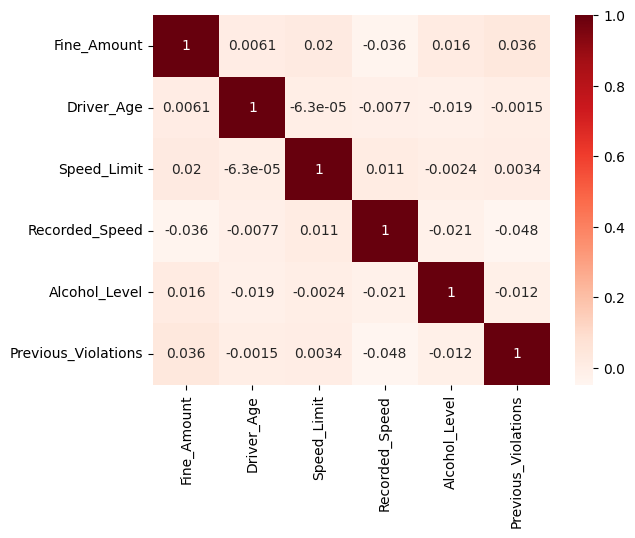

In [739]:
numerical_dataframe = cleaned_data_frame.select_dtypes(include=['number'])  # Fixed

sns.heatmap(numerical_dataframe.corr(),cmap="Reds",annot=True)


In [744]:
cleaned_data_frame.describe()

,Fine_Amount,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level,Previous_Violations
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2529.821250,46.658000,59.817500,69.479000,0.251408,2.47750
std,1417.415712,16.865858,23.633267,29.394652,0.143744,1.71398
min,100.000000,18.000000,30.000000,20.000000,0.000000,0.00000
25%,1280.750000,32.000000,40.000000,43.000000,0.130000,1.00000
50%,2506.000000,47.000000,60.000000,70.000000,0.250000,2.00000
75%,3733.000000,61.000000,80.000000,95.000000,0.380000,4.00000
max,5000.000000,75.000000,100.000000,120.000000,0.500000,5.00000


In [741]:
numerical_dataframe

,Fine_Amount,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level,Previous_Violations
0,4544,25,100,95,0.03,3
1,2776,32,40,48,0.45,2
2,4785,67,80,26,0.31,4
3,1138,46,100,115,0.09,5
4,1610,63,30,115,0.28,0
...,...,...,...,...,...,...
3995,2180,21,100,90,0.15,2
3996,2708,69,100,90,0.21,4
3997,3163,63,60,54,0.28,2
3998,1691,43,30,77,0.28,2


In [742]:
cleaned_data_frame.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


In [743]:
numerical_dataframe.Driver_Age.corr(numerical_dataframe.Fine_Amount)

0.006102380428190278

In [745]:
cleaned_data_frame.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


In [746]:
df=cleaned_data_frame.copy()


violation=df["Violation_Type"].value_counts()
violation_df=pd.DataFrame(violation)
violation_df.head()

,count
Violation_Type,
Drunk Driving,488
No Helmet,463
Wrong Parking,454
Driving Without License,451
Over-speeding,448


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

<ipython-input-747-2ea5a715230c>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 23.999999999999986, 'Number of Violants')

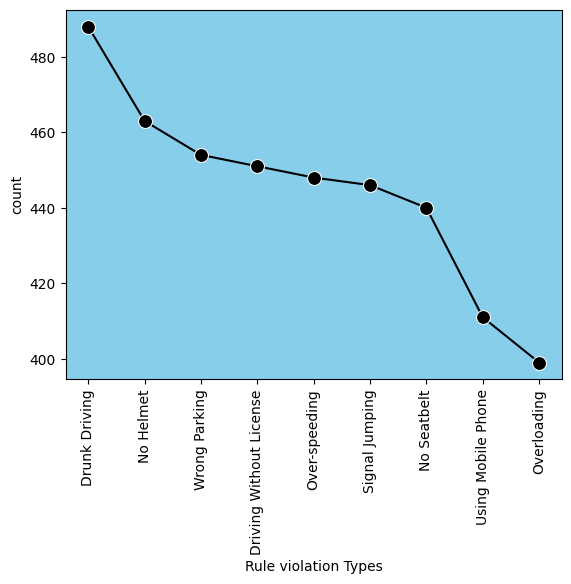

In [747]:
ax=sns.lineplot(violation_df,x="Violation_Type",y="count",marker="o",color="black",markersize=10)
ax.set_facecolor("skyblue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Rule violation Types")
ax1.set_xlabel("Number of Violants")

In [748]:
df.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/

Text(0, 0.5, 'Alcohol Level')

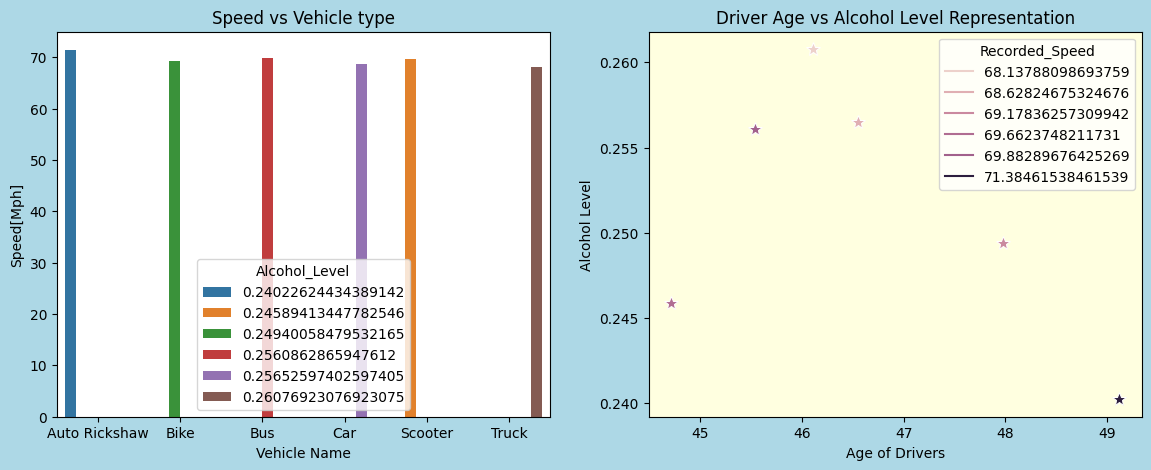

In [749]:
grouped_data=df.groupby("Vehicle_Type")[["Recorded_Speed","Alcohol_Level","Driver_Age"]].mean().reset_index()
fig,ax=plt.subplots(1,2,figsize=(14,5))

sns.barplot(data=grouped_data, x="Vehicle_Type", y="Recorded_Speed",hue="Alcohol_Level",ax=ax[0])
ax[0].set_title("Speed vs Vehicle type")
ax[0].set_xlabel("Vehicle Name")
ax[0].set_ylabel("Speed[Mph]")
ax[0].set_facecolor("white")
sns.lineplot(data=grouped_data,x="Driver_Age",y="Alcohol_Level",hue="Recorded_Speed",marker="*",markersize=10,ax=ax[1])
fig.patch.set_facecolor('lightblue')
ax[1].set_facecolor('lightyellow')
ax[1].set_title("Driver Age vs Alcohol Level Representation")
ax[1].set_xlabel("Age of Drivers")
ax[1].set_ylabel("Alcohol Level")

In [750]:
grouped_data_next=df.groupby(["Vehicle_Type","Driver_Age"])[["Recorded_Speed","Alcohol_Level"]].mean()
grouped_data_next


Recorded_Speed  Alcohol_Level
Vehicle_Type  Driver_Age                               
Auto Rickshaw 18               70.600000       0.265000
              19               82.444444       0.190000
              20               58.625000       0.201250
              21               79.200000       0.234000
              22               56.714286       0.297143
...                                  ...            ...
Truck         71               83.181818       0.171818
              72               48.363636       0.244545
              73               54.428571       0.164286
              74               56.411765       0.308824
              75               76.500000       0.306429

[348 rows x 2 columns]

<BarContainer object of 2 artists>

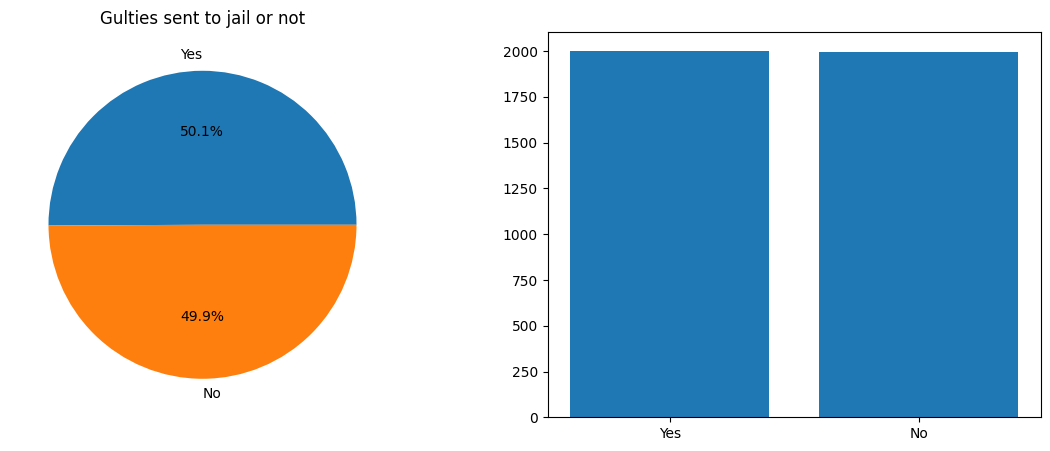

In [751]:
court=df["Court_Appearance_Required"].value_counts()
fig,ax=plt.subplots(1,2,figsize=(14,5))
ax[0].pie(court,labels=(["Yes","No"]),autopct='%1.1f%%')
ax[0].set_title("Gulties sent to jail or not")
ax[1].bar(["Yes","No"],height=court)

In [752]:
df.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


In [753]:
license=pd.DataFrame(df.License_Validity.value_counts()).reset_index()
license.columns = ['License_Validity', 'count']
import plotly.express as px
license

,License_Validity,count
0,Suspended,1371
1,Valid,1322
2,Expired,1307


In [755]:

fig = px.bar(license, y='License_Validity', x='count', title="License Validity vs Count")
fig.update_layout(
    width=800, 
    height=300,
    xaxis_title="Count",
    yaxis_title="license"
)
fig.show()

In [756]:
df.Alcohol_Level.max()
df.Alcohol_Level.min()
df["Alcoholic"]=df["Alcohol_Level"]>0
df.Alcoholic.value_counts()


Alcoholic
True     3960
False      40
Name: count, dtype: int64

In [757]:
df_1=df.Alcoholic.value_counts().reset_index()
df_1.columns=["Alcoholic","count"]

import plotly_express as px 
set_fig=px.bar(df_1,x="count",y="Alcoholic")
set_fig.update_layout(xaxis_title="Number of violents who are alcoholic",yaxis_title="True False based on alcoholic or not",title="Representation of violents who are alcoholic and non alcoholic")
set_fig.show()

In [758]:
df["Overspeed"]=df["Recorded_Speed"]>df["Speed_Limit"]
df.head()
df.Overspeed.value_counts()


df["Overspeed_and_Alcoholic"]=df["Overspeed"] & df["Alcoholic"]
df.Overspeed_and_Alcoholic.value_counts()

df.columns

Index(['Violation_Type', 'Fine_Amount', 'Location', 'Date', 'Vehicle_Type',
       'Registration_State', 'Driver_Age', 'Driver_Gender', 'License_Type',
       'Weather_Condition', 'Road_Condition', 'Officer_ID', 'Issuing_Agency',
       'License_Validity', 'Helmet_Worn', 'Seatbelt_Worn',
       'Traffic_Light_Status', 'Speed_Limit', 'Recorded_Speed',
       'Alcohol_Level', 'Court_Appearance_Required', 'Previous_Violations',
       'Comments', 'Year', 'Alcoholic', 'Overspeed',
       'Overspeed_and_Alcoholic'],
      dtype='object')

In [759]:
df_clean=df.drop(["Vehicle_Type","Registration_State","Driver_Gender","License_Type","Weather_Condition","Road_Condition","Officer_ID", 'Issuing_Agency',
       'License_Validity', 'Helmet_Worn', 'Seatbelt_Worn',
       'Traffic_Light_Status','Court_Appearance_Required', 'Previous_Violations',
       'Year',"Location"],axis=1)

In [760]:
def get_alcoholic(x):
    if x==True:
        return "Yes"
    elif x==False:
        return "No"
    else:
        return "No"

df_clean["Alcoholic"]=df_clean["Alcoholic"].apply(lambda x:get_alcoholic(x))




def get_overspeed(x):
    if x==True:
        return "Yes"
    elif x==False:
        return "No"
    else:
        return "No"

df_clean["Overspeed"]=df_clean["Overspeed"].apply(lambda x:get_overspeed(x))

def get_overspeednd(x):
    if x==True:
        return "Yes"
    elif x==False:
        return "No"
    else:
        return "No"

df_clean["Overspeed_and_Alcoholic"]=df_clean["Overspeed_and_Alcoholic"].apply(lambda x:get_overspeednd(x))

In [761]:
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(df_clean,test_size=0.2)
train_df.shape

(3200, 11)

<Axes: >

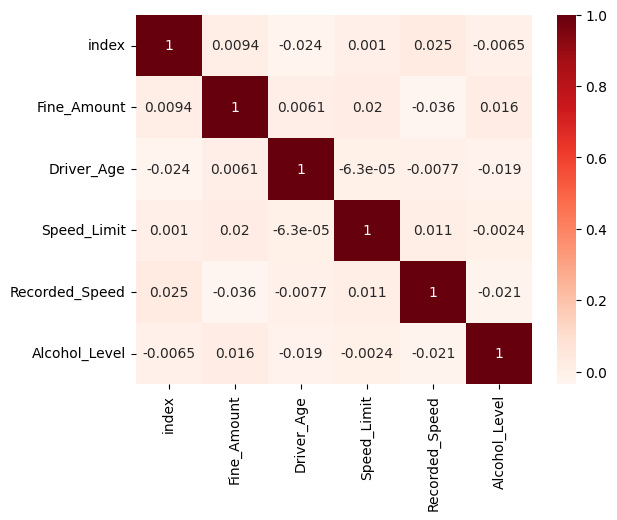

In [762]:
numerical_col=df_clean.select_dtypes(include=["number"]).reset_index()
catagorical_col=df_clean.select_dtypes('object').reset_index()
sns.heatmap(numerical_col.corr(),cmap="Reds",annot=True)

In [763]:
#Lets select the target columns and input columns
input_col = list(train_df.columns)
input_col = [col for i, col in enumerate(input_col) if i != 4]
print(input_col)

target_col="Recorded_Speed"
df_clean.head(2)

['Violation_Type', 'Fine_Amount', 'Date', 'Driver_Age', 'Recorded_Speed', 'Alcohol_Level', 'Comments', 'Alcoholic', 'Overspeed', 'Overspeed_and_Alcoholic']


,Violation_Type,Fine_Amount,Date,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level,Comments,Alcoholic,Overspeed,Overspeed_and_Alcoholic
0,Overloading,4544,2023-01-01,25,100,95,0.03,Repeat Offender,Yes,No,No
1,Driving Without License,2776,2023-01-02,32,40,48,0.45,Repeat Offender,Yes,Yes,Yes


In [764]:
train_inputs=train_df[input_col].copy()
train_target=train_df[target_col].copy()

In [765]:
type(train_target)

pandas.core.series.Series

In [766]:
#Convert_colomns to numeric dataframe 
numeric_col1=train_df.select_dtypes(include=["number"])
catagorical_column1=train_inputs.select_dtypes('object')

In [767]:
numeric_col1.describe()
numeric_col_final=list(numeric_col1)
numeric_col_final

['Fine_Amount', 'Driver_Age', 'Speed_Limit', 'Recorded_Speed', 'Alcohol_Level']

In [768]:
catagorical_col=list(catagorical_column1)
train_df[catagorical_col].describe()

,Violation_Type,Date,Comments,Alcoholic,Overspeed,Overspeed_and_Alcoholic
count,3200,3200,2413,3200,3200,3200
unique,9,3200,3,2,2,2
top,Drunk Driving,2030-11-20,First Violation,Yes,Yes,Yes
freq,392,1,816,3168,1883,1865


In [769]:
train_df[catagorical_col].Violation_Type.unique()


array(['Overloading', 'No Seatbelt', 'Signal Jumping',
       'Using Mobile Phone', 'Wrong Parking', 'No Helmet',
       'Driving Without License', 'Over-speeding', 'Drunk Driving'],
      dtype=object)

In [770]:
train_df.reset_index()
train_inputs.reset_index()
train_target.reset_index()

,index,Recorded_Speed
0,2880,36
1,655,101
2,2435,112
3,3082,116
4,1935,106
...,...,...
3195,2133,72
3196,2281,34
3197,293,88
3198,1219,102


In [771]:
#Lets train the dataseries
#Replacing nun values with mean we will use imputer for this 

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="mean")

numerical_col=list(numeric_col_final)
df_clean[numeric_col_final].isna().sum()

Fine_Amount       0
Driver_Age        0
Speed_Limit       0
Recorded_Speed    0
Alcohol_Level     0
dtype: int64

In [772]:
imputer.fit(df_clean[numeric_col_final])
list(imputer.statistics_)

[2529.82125, 46.658, 59.8175, 69.479, 0.2514075]

In [773]:
train_df[numeric_col_final]=imputer.transform(train_df[numeric_col_final])
train_df[numeric_col_final].describe()

,Fine_Amount,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level
count,3200.00000,3200.000000,3200.00000,3200.000000,3200.000000
mean,2533.63625,46.720625,59.86250,69.285625,0.250875
std,1415.80030,16.851170,23.76384,29.342972,0.143785
min,103.00000,18.000000,30.00000,20.000000,0.000000
25%,1284.00000,32.000000,40.00000,43.000000,0.130000
50%,2509.50000,47.000000,55.00000,70.000000,0.250000
75%,3710.25000,61.000000,80.00000,95.000000,0.380000
max,5000.00000,75.000000,100.00000,120.000000,0.500000


# Scaling neumeric feature

In [774]:
numeric_col_final=train_inputs.select_dtypes(include=["number"])
numeric_col_final=list(numeric_col_final)
numeric_col_final

['Fine_Amount', 'Driver_Age', 'Recorded_Speed', 'Alcohol_Level']

In [775]:
from sklearn.preprocessing import MinMaxScaler

In [776]:
scaler=MinMaxScaler()

In [777]:
scaler.fit(train_df[numeric_col_final])

MinMaxScaler()

In [778]:
scaler.data_max_
scaler.data_min_

array([103.,  18.,  20.,   0.])

In [779]:
train_inputs[numeric_col_final]=scaler.transform(train_inputs[numeric_col_final])
train_inputs

,Violation_Type,Fine_Amount,Date,Driver_Age,Recorded_Speed,Alcohol_Level,Comments,Alcoholic,Overspeed,Overspeed_and_Alcoholic
2880,Overloading,0.729222,2030-11-20,0.035088,0.16,0.90,NaN,Yes,No,No
655,No Seatbelt,0.751276,2024-10-17,0.701754,0.81,0.14,Repeat Offender,Yes,Yes,Yes
2435,No Seatbelt,0.450888,2029-09-01,0.824561,0.92,0.64,Fine Paid On Spot,Yes,Yes,Yes
3082,No Seatbelt,0.382683,2031-06-10,0.719298,0.96,0.08,Fine Paid On Spot,Yes,Yes,Yes
1935,Signal Jumping,0.299775,2028-04-19,0.421053,0.86,0.26,First Violation,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
2133,Drunk Driving,0.108230,2028-11-03,0.210526,0.52,0.16,Repeat Offender,Yes,Yes,Yes
2281,No Helmet,0.753114,2029-03-31,0.333333,0.14,0.90,Fine Paid On Spot,Yes,Yes,Yes
293,Signal Jumping,0.625281,2023-10-21,0.052632,0.68,0.34,Fine Paid On Spot,Yes,Yes,Yes
1219,Signal Jumping,0.982234,2026-05-04,0.807018,0.82,0.20,Repeat Offender,Yes,Yes,Yes


# ENCODING CATAGORICAL DATA SET 

In [780]:
train_df[catagorical_col]
from sklearn.preprocessing import OneHotEncoder

In [781]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [782]:
encoder.fit(train_df[catagorical_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [783]:
encoder.categories_

[array(['Driving Without License', 'Drunk Driving', 'No Helmet',
        'No Seatbelt', 'Over-speeding', 'Overloading', 'Signal Jumping',
        'Using Mobile Phone', 'Wrong Parking'], dtype=object),
 array(['2023-01-01', '2023-01-03', '2023-01-04', ..., '2033-12-11',
        '2033-12-12', '2033-12-13'], dtype=object),
 array(['Fine Paid On Spot', 'First Violation', 'Repeat Offender', nan],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [784]:
encoded_cols=list(encoder.get_feature_names_out(catagorical_col))



In [785]:
import warnings
from pandas.errors import PerformanceWarning


warnings.filterwarnings('ignore', category=PerformanceWarning)

encoded_array=encoder.transform(train_df[catagorical_col]).copy()
train_inputs[encoded_cols]=encoder.transform(train_inputs[catagorical_col]).copy()


In [786]:
train_inputs.to_parquet("train_inputs.parquet")

In [787]:
pd.DataFrame(train_target).to_parquet("train_target.parquet")

In [788]:
train_input=pd.read_parquet("./train_inputs.parquet")
train_targets=pd.read_parquet("./train_target.parquet")

In [789]:
from sklearn.linear_model import LogisticRegression

In [790]:
model=LogisticRegression(solver="liblinear")

In [791]:
model.fit(train_inputs[numeric_col_final+encoded_cols],train_target)   #Targets can be catagorical be inputs cannot be catagorical

LogisticRegression(solver='liblinear')

In [792]:
model.coef_.tolist()
train_inputs[numeric_col_final+encoded_cols]
print(train_target)

2880     36
655     101
2435    112
3082    116
1935    106
       ... 
2133     72
2281     34
293      88
1219    102
1235     42
Name: Recorded_Speed, Length: 3200, dtype: int64


In [793]:
list(model.intercept_)
model.intercept_[0]

-1.1226487828300593

<Axes: xlabel='weight', ylabel='feature'>

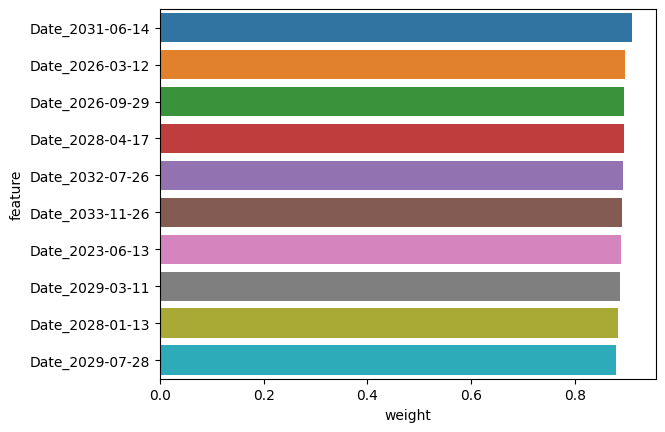

In [794]:
weight_df=pd.DataFrame({
        "feature":numeric_col_final+encoded_cols,
         "weight":model.coef_.tolist()[0]
})



weight_df_10=weight_df.sort_values("weight",ascending=False).head(10)
sns.barplot(data=weight_df_10,x="weight",y="feature")

<Axes: xlabel='weight', ylabel='feature'>

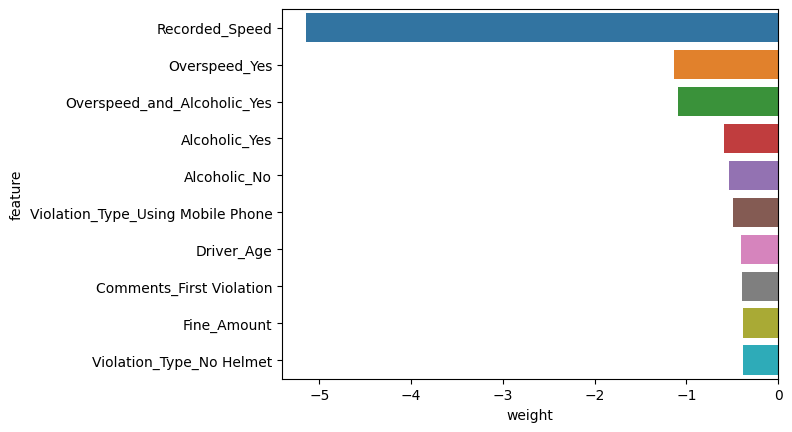

In [795]:

weight_df_11=weight_df.sort_values("weight",ascending=True).head(10)
sns.barplot(data=weight_df_11,x="weight",y="feature")

<Axes: xlabel='weight', ylabel='feature'>

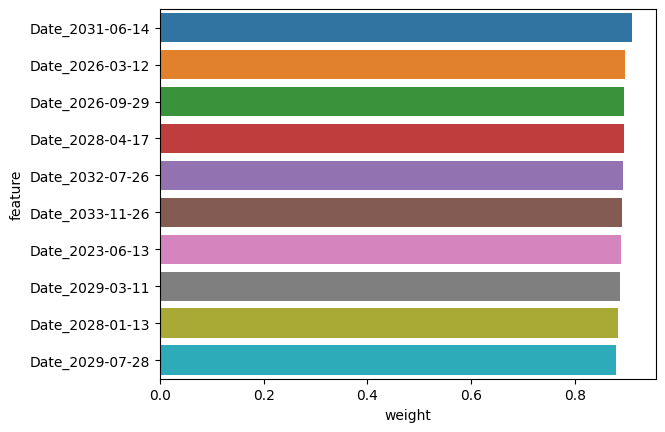

In [796]:
sns.barplot(data=weight_df.sort_values("weight",ascending=False).head(10),x="weight",y="feature")

In [797]:
prediction=model.predict(train_inputs[numeric_col_final+encoded_cols])
list(train_df[target_col])
print("Listed target columns")

Listed target columns


In [800]:
print(list(prediction))
len(prediction)
columns=["Index","Predicted_Speed"]
prediction_dataframe=pd.DataFrame(prediction,columns=["Predicted_speed"])
prediction_dataframehead=prediction_dataframe.head(10)
train_target_dataframe=pd.DataFrame(train_target)
print("Train_target_selected")

[36, 82, 112, 116, 106, 26, 62, 115, 82, 89, 90, 36, 32, 50, 70, 24, 85, 83, 115, 79, 55, 63, 46, 35, 87, 106, 70, 51, 52, 94, 71, 21, 95, 84, 33, 24, 72, 106, 109, 98, 80, 70, 52, 103, 33, 96, 99, 52, 76, 22, 71, 82, 94, 93, 55, 52, 77, 115, 90, 102, 94, 80, 51, 44, 23, 27, 22, 110, 25, 82, 92, 113, 64, 96, 51, 70, 90, 38, 110, 50, 110, 106, 117, 118, 71, 57, 98, 52, 61, 25, 101, 44, 25, 103, 94, 117, 53, 80, 95, 105, 107, 95, 62, 118, 110, 51, 20, 78, 22, 21, 28, 84, 25, 29, 90, 67, 97, 71, 76, 63, 111, 71, 30, 106, 30, 30, 54, 33, 77, 34, 54, 34, 32, 42, 43, 48, 37, 77, 55, 23, 112, 53, 44, 46, 42, 68, 95, 56, 102, 32, 20, 63, 117, 91, 64, 118, 57, 38, 28, 89, 71, 34, 99, 73, 33, 79, 112, 97, 36, 95, 36, 72, 36, 29, 36, 42, 67, 115, 58, 30, 78, 87, 79, 81, 47, 105, 94, 32, 56, 55, 120, 78, 78, 100, 29, 98, 68, 106, 28, 77, 110, 93, 30, 21, 35, 117, 45, 29, 38, 116, 26, 43, 22, 46, 46, 105, 60, 69, 77, 28, 81, 100, 86, 78, 67, 94, 88, 85, 82, 105, 112, 44, 99, 82, 66, 49, 26, 113, 28

In [801]:
import pandas as pd
import plotly.express as px

combined_dataframe=merged_df = combined_dataframe = pd.merge(prediction_dataframe, 
                              train_target_dataframe, 
                              left_index=True, right_index=True)
final_df=combined_dataframe.head(20)
final_df

,Predicted_speed,Recorded_Speed
0,36,95
2,112,26
3,116,115
4,106,115
5,26,87
6,62,24
8,82,36
10,90,107
11,36,62
12,32,32


Text(0, 0.5, 'Speed')

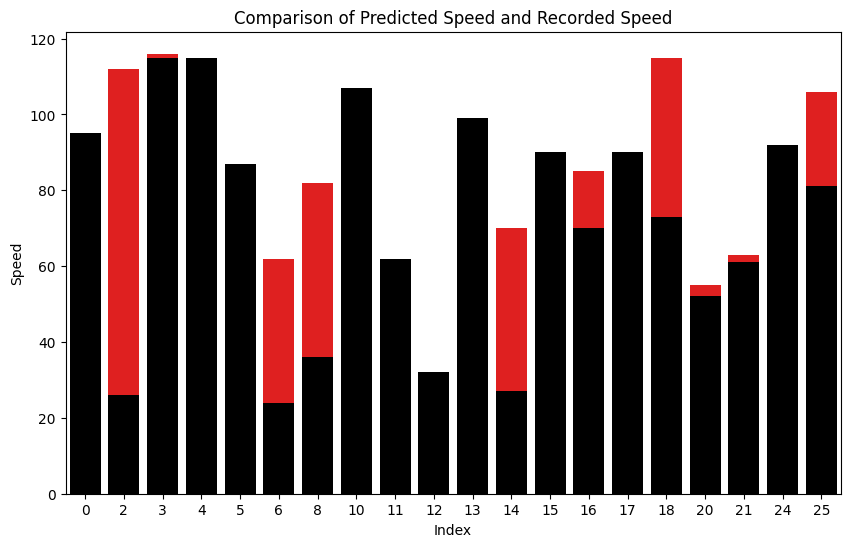

In [802]:
plt.figure(figsize=(10,6))


fig=sns.barplot(final_df,y="Predicted_speed",x=final_df.index,color="red")
fig=sns.barplot(final_df,y="Recorded_Speed",x=final_df.index,color="black")
plt.title("Comparison of Predicted Speed and Recorded Speed")
plt.xlabel("Index")
plt.ylabel("Speed")


In [803]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,prediction)

0.695625